# Import all the libraries along with Dataset

In [1]:
import numpy as np  # for numerical computations, like handling arrays.
import pandas as pd # data manipulation and analysis.
import matplotlib.pyplot as plt # For creating visualizations.
import seaborn as sns # For advanced visualization 
import cv2 # OpenCV for image processing tasks.
import glob as gb
import glob
from tensorflow.keras.utils import to_categorical

# Generates batches of tensor image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential # Sequential model is a linear stack of layers.
from tensorflow.keras import layers # Provides building blocks for defining layers.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Essential layers for CNN.
from tensorflow.keras.optimizers import Adam  # Optimizer for updating model weights.

# Import callbacks for model optimization during training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint ,ReduceLROnPlateau
from tensorflow import keras
import tensorflow as tf
# to plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Importing data processing files from the specified directory
import os
print(os.listdir("/kaggle/input/new-plant-diseases-dataset"))

['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']


# Performing EDA (Exploritry Data Analysis) 
* **Assing the path**
* **Counting the total number of images in all dir**
* **Ploting a bar graph for visualization** 
* **Displaying some "diseased" and "healthy"** 

In [2]:
# Define Paths
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
# Dictionary to store the count of images in each class
image_counts = {}

# Loop through each class directory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of images in the class directory
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        image_counts[class_name] = num_images

# Create a DataFrame and sort alphabetically by class name
df = pd.DataFrame(list(image_counts.items()), columns=["Class Name", "Total Images"])
df = df.sort_values(by="Class Name").reset_index(drop=True)

# Display the table
print(df)

# Display total images across all classes
total_images = df["Total Images"].sum()
print(f"\nTotal Images in Dataset: {total_images}")

                                           Class Name  Total Images
0                                  Apple___Apple_scab          2016
1                                   Apple___Black_rot          1987
2                            Apple___Cedar_apple_rust          1760
3                                     Apple___healthy          2008
4                                 Blueberry___healthy          1816
5            Cherry_(including_sour)___Powdery_mildew          1683
6                   Cherry_(including_sour)___healthy          1826
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...          1642
8                         Corn_(maize)___Common_rust_          1907
9                 Corn_(maize)___Northern_Leaf_Blight          1908
10                             Corn_(maize)___healthy          1859
11                                  Grape___Black_rot          1888
12                       Grape___Esca_(Black_Measles)          1920
13         Grape___Leaf_blight_(Isariopsis_Leaf_

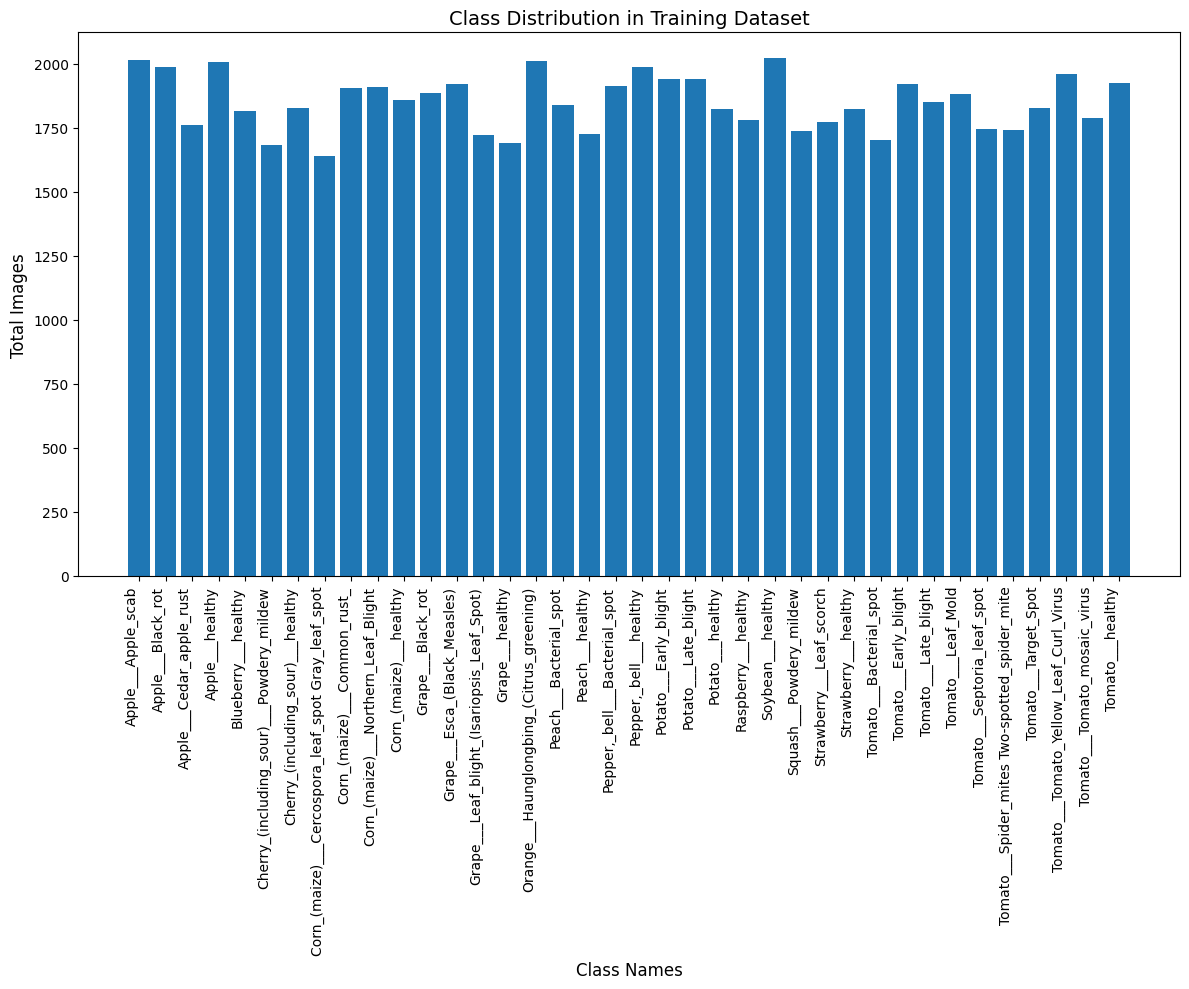

In [4]:
# Sort the dictionary by class names
image_counts = dict(sorted(image_counts.items()))

# Extract class names and image counts
class_names = list(image_counts.keys())
image_totals = list(image_counts.values())

# Generate a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", len(image_counts))

# Plotting the bar chart
plt.figure(figsize=(12, 10))
plt.bar(class_names, image_totals)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Total Images', fontsize=12)
plt.title('Class Distribution in Training Dataset', fontsize=14)
plt.tight_layout()

# Display the bar chart
plt.show()

In [5]:
# Dictionary to store the count of images in each class
image_counts = {}

# Loop through each class directory
for class_name in os.listdir(valid_dir):
    class_path = os.path.join(valid_dir, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of images in the class directory
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        image_counts[class_name] = num_images

# Create a DataFrame and sort alphabetically by class name
df = pd.DataFrame(list(image_counts.items()), columns=["Class Name", "Total Images"])
df = df.sort_values(by="Class Name").reset_index(drop=True)

# Display the table
print(df)

# Display total images across all classes
total_images = df["Total Images"].sum()
print(f"\nTotal Images in Dataset: {total_images}")

                                           Class Name  Total Images
0                                  Apple___Apple_scab           504
1                                   Apple___Black_rot           497
2                            Apple___Cedar_apple_rust           440
3                                     Apple___healthy           502
4                                 Blueberry___healthy           454
5            Cherry_(including_sour)___Powdery_mildew           421
6                   Cherry_(including_sour)___healthy           456
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...           410
8                         Corn_(maize)___Common_rust_           477
9                 Corn_(maize)___Northern_Leaf_Blight           477
10                             Corn_(maize)___healthy           465
11                                  Grape___Black_rot           472
12                       Grape___Esca_(Black_Measles)           480
13         Grape___Leaf_blight_(Isariopsis_Leaf_

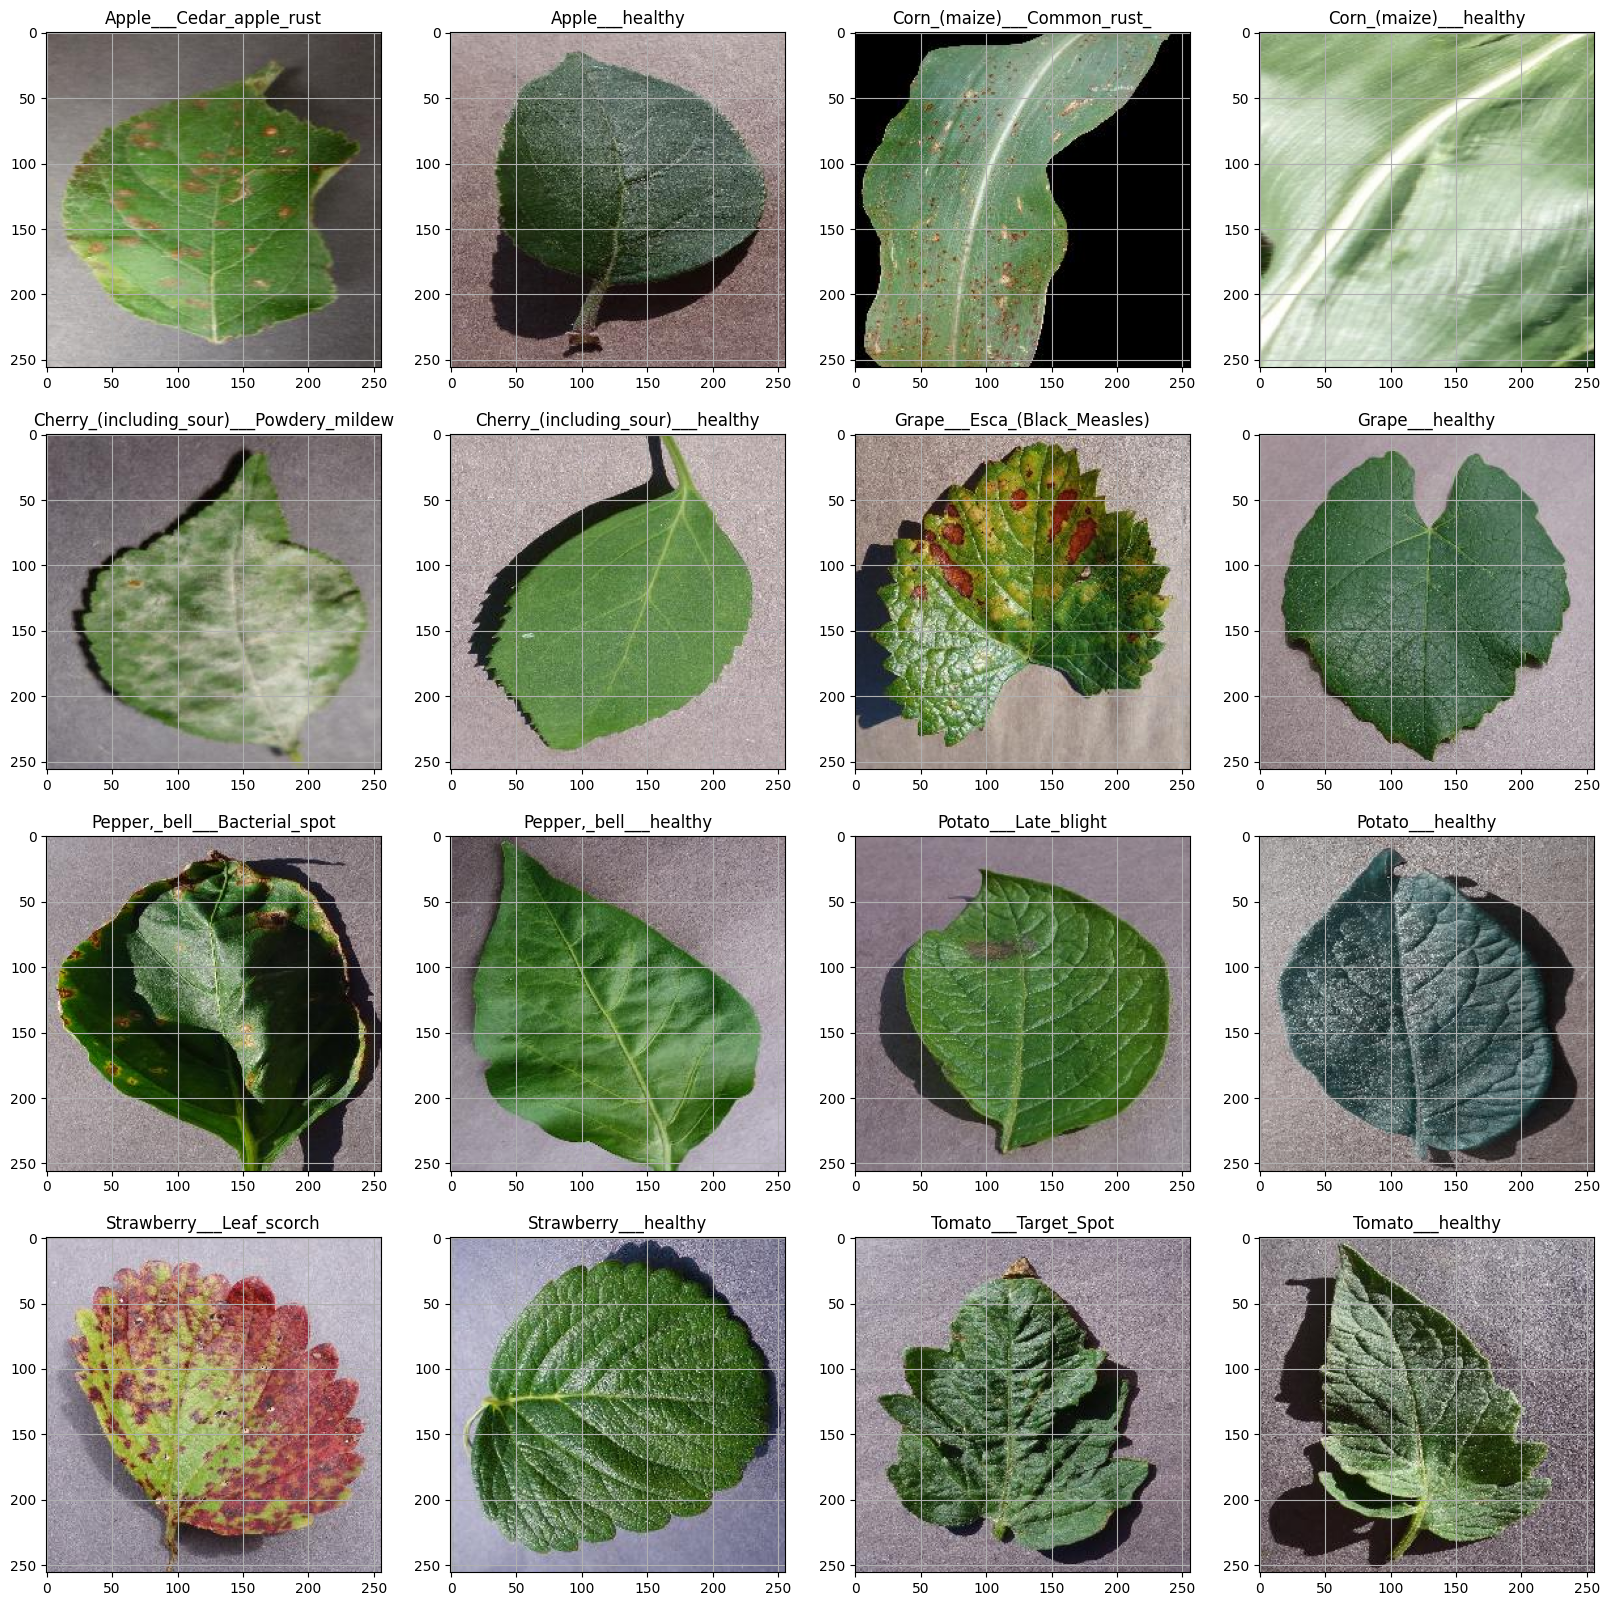

In [6]:
# Classes to Display
classes_to_display = [
    "Apple___Cedar_apple_rust", 
    "Apple___healthy", 
    "Corn_(maize)___Common_rust_", 
    "Corn_(maize)___healthy", 
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Grape___Esca_(Black_Measles)", 
    "Grape___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Late_blight",
    "Potato___healthy",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Target_Spot",
    "Tomato___healthy"
]

# Function to Display Images
def display_images_from_classes(base_dir, class_list, num_images=1):
    plt.figure(figsize=(20, 20))
    img_count = 1
    
    for class_name in class_list:
        class_path = os.path.join(base_dir, class_name)
        images = os.listdir(class_path)

        # Display a few images from each class
        for img_file in images[:num_images]:
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(4, 4, img_count)
            plt.imshow(img)
            plt.title(class_name)
            plt.grid(None)
            plt.axis('on')
            img_count += 1

    plt.show()

# Display Images
display_images_from_classes(train_dir, classes_to_display)

# Preprocessing the training data, validation data 
* **Splitting the data into 80% for training and 20% for validation**

In [7]:
# Preprocessing the data

# Defines the number of samples processed before the model updates.
batch_size = 128

# Data Augmentation and Normalization for Training
train_datagen = ImageDataGenerator(
    rescale=1/255.0, # Normalizes pixel values to a range of 0 to 1.
    rotation_range=90, # Randomly rotates images by up to 90 degrees.
    width_shift_range=0.0, # No horizontal shifting of images.
    height_shift_range=0.0, # No vertical shifting of images.
    shear_range=0.0, # No shearing transformations applied.
    zoom_range=0.0, # No zoom transformations applied.
    horizontal_flip=False, # No horizontal flipping.
    vertical_flip = False, # No vertical flipping.
    preprocessing_function = None, # No additional preprocessing.
    validation_split=0.2 # Reserves 20% for validation.
)

# Load Data for Training
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), # Resizes all images to 224x224 pixels.
    batch_size=batch_size, 
    color_mode = 'rgb',  # 3-channel RGB images.
    shuffle = True, # Shuffles data to improve training generalization.
    subset ='training', # Use 80% of data for training 
     # for multi-classification purposes use 'categorical'
    # if we have single class we can use 'binary' as a class mode
    class_mode='categorical'
)

# Data Augmentation and Normalization for validation
valid_datagen = ImageDataGenerator(
    rescale=1/255.0, # Normalizes pixel values to a range of 0 to 1.
    preprocessing_function = None, # No additional preprocessing.
    validation_split = 0.2 
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(224, 224), 
    batch_size=batch_size, 
    color_mode = 'rgb',
    shuffle = False,
    subset ='validation',
    class_mode='categorical' # Categorial is used for multi-classification purposes
)


# Data Normalization for Testing
test_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    preprocessing_function = None
)

test_generator = valid_datagen.flow_from_directory(
    valid_dir, # Testing data directory (using validation directory for demonstration).
    target_size=(224, 224), 
    batch_size=batch_size, 
    color_mode = 'rgb',
    shuffle = False,
    class_mode='categorical' # Categorial is used for multi-classification purposes 
)

Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


# CNN Architecture 

In [8]:
# Define the CNN architecture
model = keras.models.Sequential() 

# Convolutional Layer 1
# 32 filters, each with a 7x7 kernel, ReLU activation function adding 'strides' and 'padding' as same
# Input shape: (224, 224, 3) - input images of size 224x224 pixels with 3 channel (RGB)
model.add(keras.layers.Conv2D(32,(7,7), activation = 'relu', strides = 1, padding="same", input_shape=(224,224,3), name="Conv1"))

# Max pooling with a 2x2 window size, reducing spatial dimensions by half
model.add(keras.layers.MaxPooling2D(2,2, name='Pool1'))


# Convolutional Layer 2
# 64 filters, each with a 5x5 kernel, ReLU activation function adding 'strides' and 'padding' as same
model.add(keras.layers.Conv2D(64,(5,5), activation = 'relu',strides = 1, padding="same", name="Conv2"))
model.add(keras.layers.MaxPooling2D(2,2, name='Pool2'))

# Convolutional Layer 3
# 128 filters, each with a 3x3 kernel, ReLU activation function adding 'strides' and 'padding' as same
# we are not adding Maxpooling layer, fordeeper feature extraction before reducing the spatial dimensions.
model.add(keras.layers.Conv2D(128,(3,3), activation = 'relu',strides = 1, padding="same",name="Conv3"))

# Convolutional Layer 4
# 256 filters, each with a 3x3 kernel, ReLU activation function adding 'strides' and 'padding' as same
model.add(keras.layers.Conv2D(256,(3,3), activation = 'relu',strides = 1,padding="same", name="Conv4"))
model.add(keras.layers.MaxPooling2D(2,2, name='Pool3'))


# Flatten layer to convert 2D feature maps to 1D feature vectors
model.add(keras.layers.Flatten(name="Flatten"))

# Fully Connected Layer 1
# 128 neurons with ReLU activation.
model.add(keras.layers.Dense(128, activation='relu', name='Dense1'))
# Prevents overfitting by randomly dropping 50% of neurons.
tf.keras.layers.Dropout(0.5)

# Fully Connected Layer 2
# 64 neurons with ReLU activation.
model.add(keras.layers.Dense(64, activation='relu', name='Dense2'))
tf.keras.layers.Dropout(0.5)

# Output layer
# 38 neurons for classification (38 classes), softmax activation for multiclass classification
model.add(keras.layers.Dense(38, activation='softmax', name='output'))

# Prints model architecture.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model and evaluvating training and validation data

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

model.compile(
    loss='categorical_crossentropy', 
    optimizer= 'Adam', 
    metrics=["accuracy"])

history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


440/440 ━━━━━━━━━━━━━━━━━━━━ 1004s 2s/step - accuracy: 0.1695 - loss: 3.0689 - val_accuracy: 0.5124 - val_loss: 1.6250 - learning_rate: 0.0010
Epoch 2/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 0.6096 - loss: 1.2799 - val_accuracy: 0.7065 - val_loss: 0.9563 - learning_rate: 0.0010
Epoch 3/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 633s 1s/step - accuracy: 0.7633 - loss: 0.7444 - val_accuracy: 0.7588 - val_loss: 0.7818 - learning_rate: 0.0010
Epoch 4/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.8301 - loss: 0.5297 - val_accuracy: 0.8267 - val_loss: 0.5677 - learning_rate: 0.0010
Epoch 5/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.8621 - loss: 0.4227 - val_accuracy: 0.8641 - val_loss: 0.4050 - learning_rate: 0.0010
Epoch 6/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.8979 - loss: 0.3169 - val_accuracy: 0.8855 - val_loss: 0.3534 - learning_rate: 0.0010
Epoch 7/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.9100 - loss: 0.2749 - val

In [10]:
# Test dataset predictions
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Loss: {test_loss}")
print(f"Accuracy: {test_accuracy}")

test_predictions = np.argmax(model.predict(test_generator), axis=-1)
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

138/138 ━━━━━━━━━━━━━━━━━━━━ 129s 936ms/step - accuracy: 0.9376 - loss: 0.1885
Loss: 0.21788477897644043
Accuracy: 0.928465723991394
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step


# Evaluvate the model accuracy

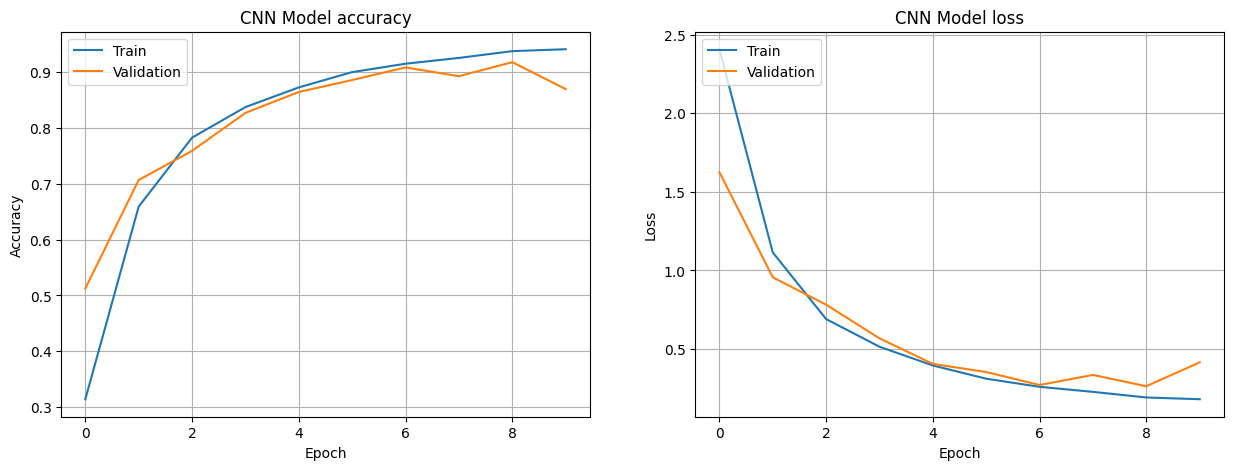

In [11]:
# Visualize training and validation metrics
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()

In [12]:
# Save the trained model
model.save('plant_disease_model.keras') # Saves the entire model.

# Compute Confusion Matrix (with normalization)

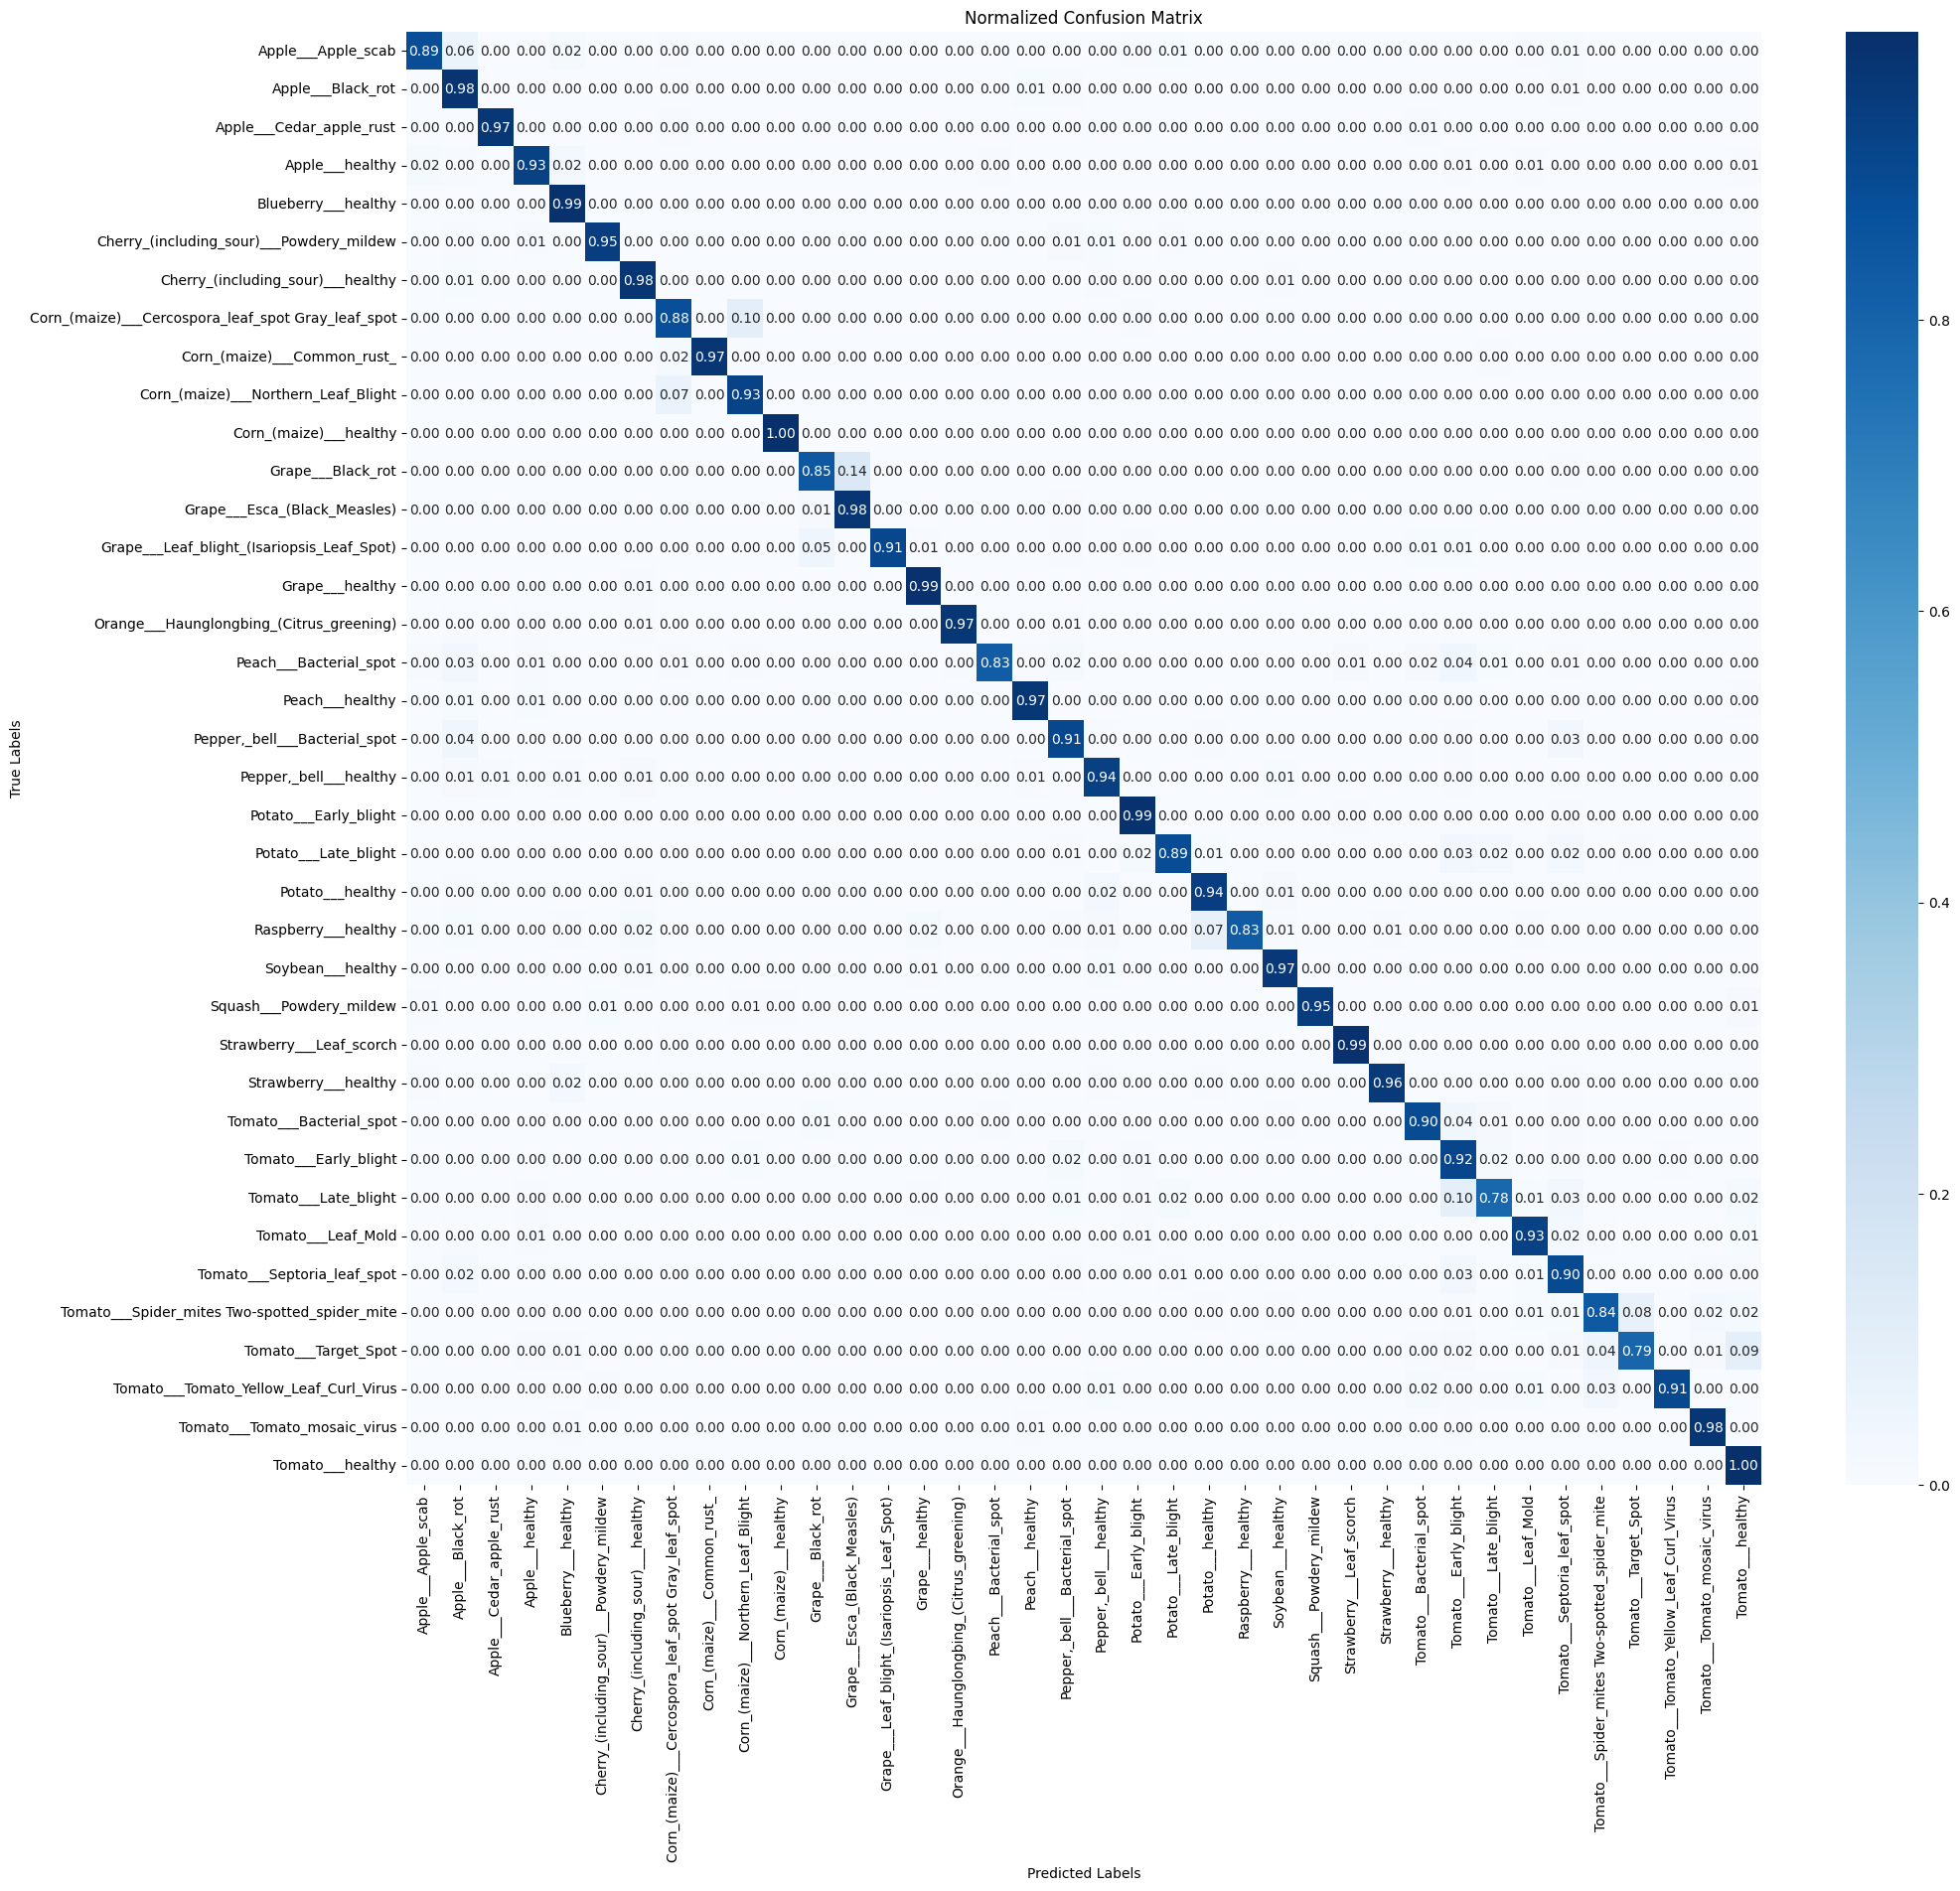

In [20]:
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')  # 'true' normalizes rows to sum to 1

# Plot Confusion Matrix
plt.figure(figsize=(22, 19))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# Classification Report

In [21]:
report = classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.89      0.92       504
                                 Apple___Black_rot       0.82      0.98      0.89       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.95      0.93      0.94       502
                               Blueberry___healthy       0.91      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.95      0.96       421
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.88      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight     